# Data Exploration

File loads in the .csv file for the australian horses data from kaggle and plots a few bits to see if there are any interesting insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# columns to read
col = ['position','position_again','position_two','margin','bf_odds','betfair_slope',
           'market_id','date','market_name', 'condition','weather','runner_id','barrier','dfs_form_rating',
           'tech_form_rating','handicap_weight','last_five_starts','prize_money',
           'sex','age','last_twenty_starts','field_strength','days_since_last_run']

# Specify dtypes to save memory when reading
data_types = {'position' : float,'position_again' : float,'position_two' : float,'margin' : float,
              'bf_odds' : float,'betfair_slope' : float, 'market_id' : float, 'date':str,'market_name':str, 
              'condition' : str,'weather' : str,'runner_id' : float,'barrier' : float,
              'dfs_form_rating' : float,'tech_form_rating' : float,'last_five_starts' : str,
              'prize_money' : float, 'sex' : str,'age' : float,'last_twenty_starts' : str,
              'field_strength' : float,'days_since_last_run' : float, 'handicap_weight' : float}


In [3]:
horses = pd.read_csv('input/horses.csv',sep = ',', usecols = col, 
                     index_col = 'market_id', dtype = data_types)

In [4]:
horses.head()

,position,position_again,position_two,margin,bf_odds,betfair_slope,date,market_name,condition,weather,...,dfs_form_rating,tech_form_rating,handicap_weight,last_five_starts,prize_money,sex,age,last_twenty_starts,field_strength,days_since_last_run
market_id,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,1.0,1.0,0.0,2.88,-0.001514,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,97.0,97.0,58.5,f3,2160.0,Gelding,3.0,f3,-1.5,14.0
1.0,0.0,2.0,2.0,NaN,15.00,-0.000805,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,82.0,82.0,58.5,x80x2,21175.0,Gelding,5.0,f0x6x80x2,-2.0,39.0
1.0,0.0,3.0,3.0,NaN,95.00,0.209409,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,62.0,62.0,56.5,79x00,28855.0,Mare,6.0,f68477579x00,-1.5,15.0
1.0,0.0,NaN,4.0,NaN,20.00,0.014119,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,71.0,71.0,56.5,f0,1475.0,Filly,3.0,f0,NaN,15.0
1.0,0.0,NaN,5.0,NaN,2.74,0.000521,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,91.0,91.0,56.5,f4x,1215.0,Filly,3.0,f4x,-3.5,173.0


In [5]:
horses.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 221680 entries, 1.0 to 34587.0
Data columns (total 22 columns):
position               221680 non-null float64
position_again         63219 non-null float64
position_two           217162 non-null float64
margin                 153742 non-null float64
bf_odds                221680 non-null float64
betfair_slope          221619 non-null float64
date                   221680 non-null object
market_name            221680 non-null object
condition              199492 non-null object
weather                199571 non-null object
runner_id              221680 non-null float64
barrier                195391 non-null float64
dfs_form_rating        195381 non-null float64
tech_form_rating       195391 non-null float64
handicap_weight        195391 non-null float64
last_five_starts       184731 non-null object
prize_money            194889 non-null float64
sex                    194889 non-null object
age                    194889 non-null float6

In [6]:
# get the months as a separate column...might be useful
horses['date'] = pd.to_datetime(horses['date'], format = '%Y-%m-%d')

horses['month'] = pd.DatetimeIndex(horses['date']).month

In [7]:
# The going
horses['condition'].unique()

array(['HVY9', 'HVY10', 'GOOD4', 'HVY8', 'AWT', 'SOFT6', 'SOFT5', 'SOFT7',
       'GOOD', 'GOOD3', nan, 'FIRM2', 'HEAVY'], dtype=object)

In [8]:
#weather
horses['weather'].unique()

array(['FINE', 'OCAST', 'SHWRY', nan], dtype=object)

In [9]:
#market_name
len(horses['market_name'].unique())

names = ['race_no','distance','race_type']
for i, name in enumerate(names):
    horses[name] = horses['market_name'].apply(lambda x : x.split()[i])

horses['distance'] = horses['distance'].str.slice(0,-1).astype('float32')

In [10]:
horses['race_type'].unique()

array(['Mdn', '2yo', '3yo', 'Hcap', 'CL1', 'CL2', 'CL3', 'CL5', 'WFA',
       'Listed', 'Grp3', 'Cup', 'Hrd', 'Stpl', 'Qlty', 'CL6', 'CL4',
       'Grp2', 'Qtly', 'Grp1', 'Hcp', '4yo'], dtype=object)

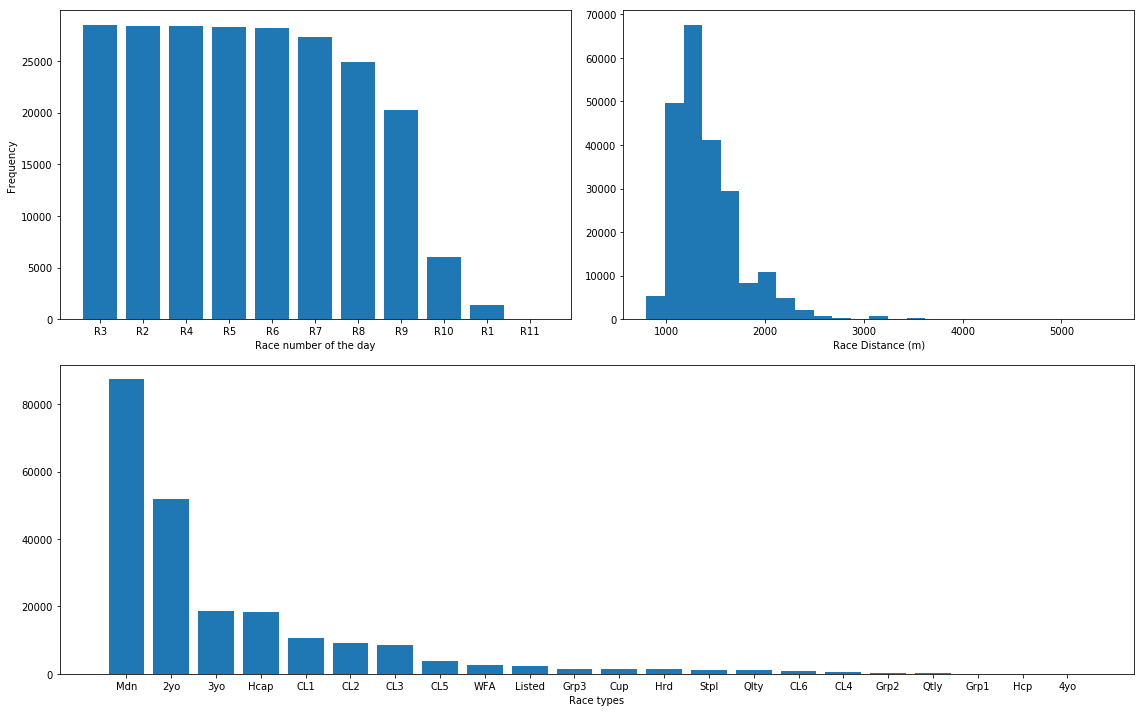

In [11]:
plt.figure(figsize = (16,10))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax1.bar(horses['race_no'].unique(), horses['race_no'].value_counts())
ax1.set_xlabel('Race number of the day')
ax1.set_ylabel('Frequency')
ax2.hist(horses['distance'],bins = 25)
ax2.set_xlabel('Race Distance (m)')
ax3.bar(horses['race_type'].unique(), horses['race_type'].value_counts())
ax3.set_xlabel('Race types')
plt.tight_layout()

Odd that there isn't much data on the very first race of the day

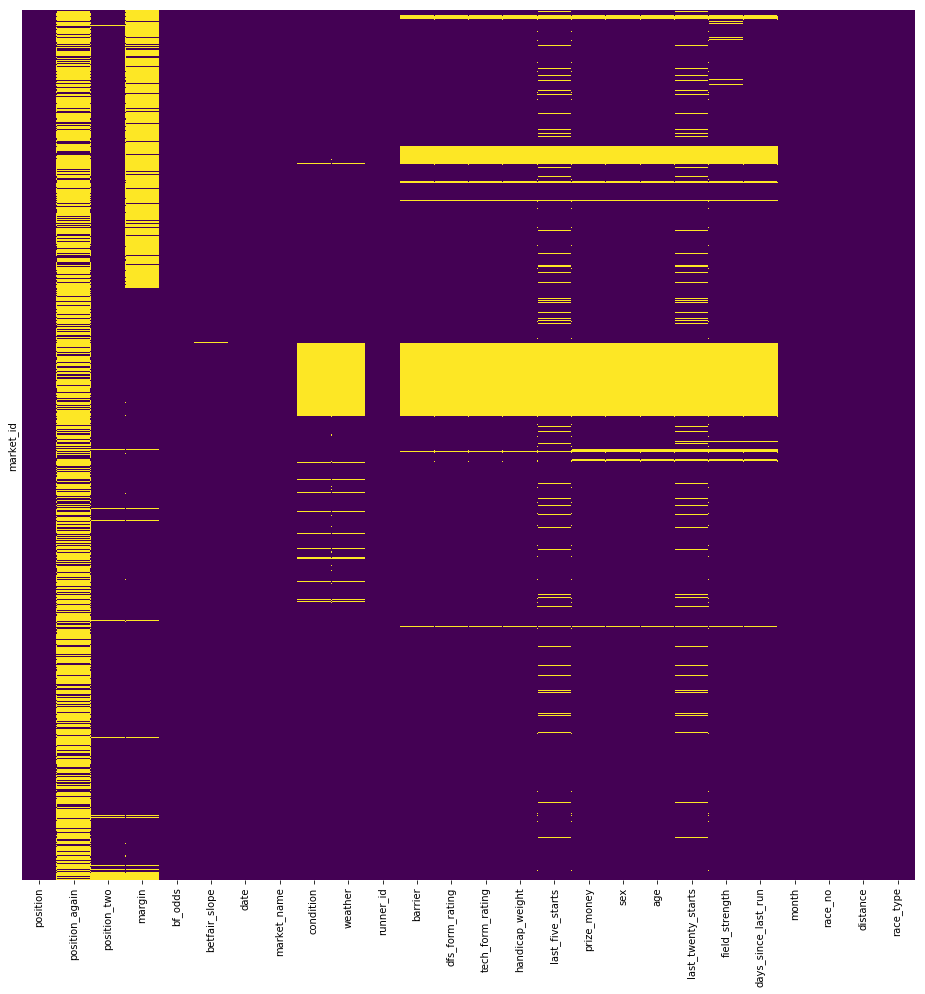

In [12]:
# Plot to see where the null values are
plt.figure(figsize = (16,16))
sns.heatmap(data = horses.isnull(), yticklabels = False, cbar = False,linewidths = 0, cmap = 'viridis')


Yellow = Missing Data <br>
comments: <br>
position_again -  data entered is just those horses which places so can fill in the rest with 0<br>
position_two - exact position - shouldn't be any missing - amount missing is minimal<br>
margin - 30 % of dataset missing - this is a bit annoying as would potentially be a good feature<br>
some entries just don't have much data on them so I'll drop them.<br>

THIS IS GENERALLY REPRESENTATIVE OF THE WHOLE DATASET, I'VE JUST LOADED A SUBSET DUE TO MEMORY ISSUES

In [13]:
# # code for comparing whether data is missing for an entire race or just a couple of runners.
x_over = list(set(horses[horses['barrier'].isnull()].index) & 
              set(horses.dropna(subset = ['barrier']).index) )# market ids which have runners 
                                                                #with and without barrier data
print('Number of races with a runner missing barrier data: ' + str(len(x_over)))
print('Total number of horses in races where some horses don''t have barrier info: ' +
      str(horses.loc[x_over].shape[0]))
print('Percentage of runners in those races which have barrier data:{:10.2f}%'
      .format(horses.dropna(subset = ['barrier']).loc[x_over].shape[0]/ horses.loc[x_over].shape[0] *100))



Number of races with a runner missing barrier data: 45
Total number of horses in races where some horses dont have barrier info: 453
Percentage of runners in those races which have barrier data:     74.61%


In [14]:
# Decided to drop all missing data and have partial data for a race.  
# Think this is valid, but depends on if any of those with missing data, won/placed
horses.dropna(subset = ['barrier'], inplace = True)


In [15]:
number_of_races = len(horses.index.unique())

In [16]:
# position_again = horses which placed
horses['position_again'].fillna(value = 0, inplace = True)

### That's tidy enough for now.  Lets plot some graphs 

In [17]:
sns.set_style('darkgrid')

In [18]:
horses.head(2)

,position,position_again,position_two,margin,bf_odds,betfair_slope,date,market_name,condition,weather,...,prize_money,sex,age,last_twenty_starts,field_strength,days_since_last_run,month,race_no,distance,race_type
market_id,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,1.0,1.0,0.0,2.88,-0.001514,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,2160.0,Gelding,3.0,f3,-1.5,14.0,6,R3,1200.0,Mdn
1.0,0.0,2.0,2.0,NaN,15.00,-0.000805,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,21175.0,Gelding,5.0,f0x6x80x2,-2.0,39.0,6,R3,1200.0,Mdn


In [69]:
win_per_handicap = horses[(horses['position'] == 1.0)].groupby('handicap_weight').count()['position'] 
horse_per_handicap = horses.groupby('handicap_weight').count()['position']
percent_win_per_handicap = win_per_handicap / horse_per_handicap
percent_win_per_handicap.fillna(0, inplace = True)

Text(0, 0.5, 'Frequency')

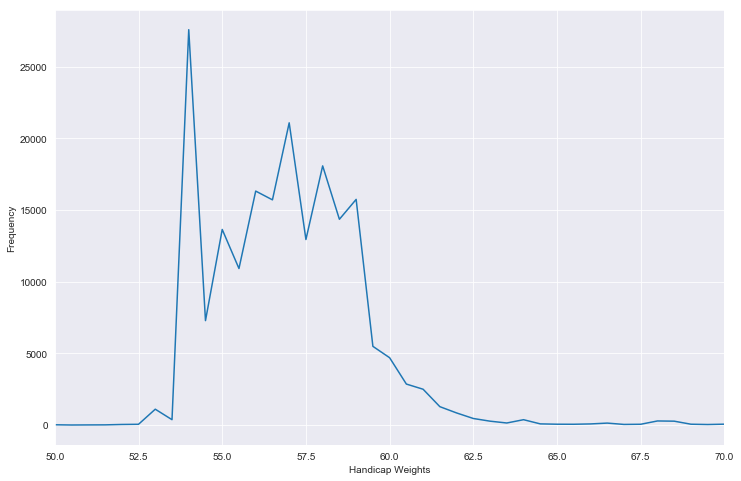

In [75]:
plt.figure(figsize = (12,8))
plt.plot(horse_per_handicap.index, horse_per_handicap)
plt.xlim([50,70])
plt.xlabel('Handicap Weights')
plt.ylabel('Frequency')

Majority of the horses sit between 52.5 and 62.5 kg

Text(0, 0.5, 'Percentage in weight class which won their race')

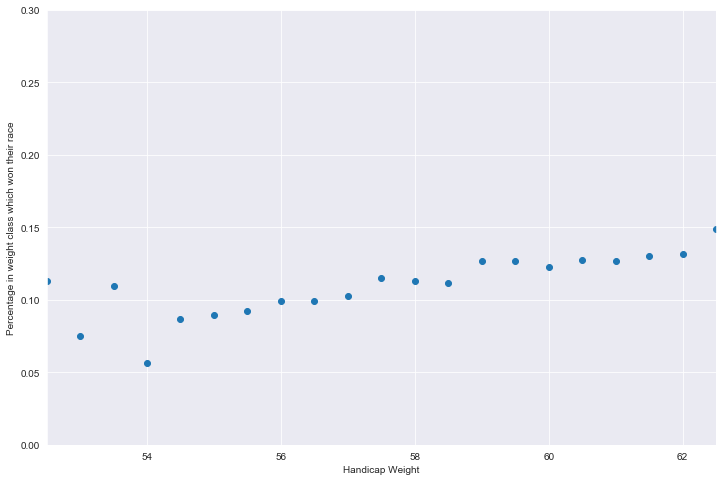

In [81]:
fig, ax1 = plt.subplots(figsize = (12,8))
ax1.scatter(percent_win_per_handicap.index, percent_win_per_handicap)
ax1.set_xlim(52.5,62.5)
ax1.set_ylim(0,0.3)
ax1.set_xlabel('Handicap Weight')
ax1.set_ylabel('Percentage in weight class which won their race')

There is a trend.  It seems the heavier the horses the more likely to win